# **Building Regression Models**

We will be building regression models of MAO-B using HistGradientBoosting, XGB, 
 LGBM and Random Forest.

---

## **Importing libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
import lightgbm as ltb
from sklearn.ensemble import RandomForestRegressor
import numpy as np

## **Loading the data set**

In [ ]:
df = pd.read_csv('bioactivity_data_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.744727
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.045757
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.356547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3931,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3932,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3933,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.524329


## **Features**
The ***Monoamine oxidase B*** data set contains 880 input features (fingerprints/functional groups) and 1 output variable (pIC50 values).

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3931,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3932,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3933,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df.pIC50
Y

0       3.000000
1       3.000000
2       7.744727
3       8.045757
4       8.356547
          ...   
3930    4.301030
3931    4.301030
3932    4.301030
3933    4.524329
3934    4.000000
Name: pIC50, Length: 3935, dtype: float64

### **Examining the data dimension**

In [ ]:
X.shape

(3935, 881)

In [ ]:
Y.shape

(3935,)

### **Removing low variance features**
The variance threshold is a feature selector that removes all low-variance features. By default, it removes all zero-variance features, i.e., features with the same value in all samples.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.1)    
X = selection.fit_transform(X)

In [ ]:
X.shape

(3935, 232)

## **4. Data split (90/10 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((3541, 232), (3541,))

In [ ]:
X_test.shape, Y_test.shape

((394, 232), (394,))

## **6. Building a Regression Model using HistGradientBoosting**

In [ ]:
'''
Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
max_iter = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # 11 integers in range 10-110
max_depth.append(None)
max_leaf_nodes = [int(x) for x in np.linspace(31, 110, num = 11)] 
learning_rate =[0.1,0.2,0.3]
# Create the random grid
random_grid = {'max_iter': max_iter,
               'max_depth': max_depth,
               'max_leaf_nodes':max_leaf_nodes,
               'learning_rate':learning_rate
               }

# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = HistGradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_grid = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_grid.fit(X, Y)
print('Best hyperparameters are: '+str(model_grid.best_params_))'''

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
model = HistGradientBoostingRegressor(learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=40, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_train, Y_train)
r2

0.6871215726114641

In [ ]:
Y_pred = model.predict(X_test)
print('Coefficient of determination (R^2): %.2f' 
      % r2_score(Y_test, Y_pred)) # A higher coefficient indicates a better fit for the model
print('Mean squared error (MSE): %.2f'  # Lower the MSE, the closer is forecast to actual
      % mean_squared_error(Y_test, Y_pred))

Coefficient of determination (R^2): 0.51
Mean squared error (MSE): 1.31


## **7. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

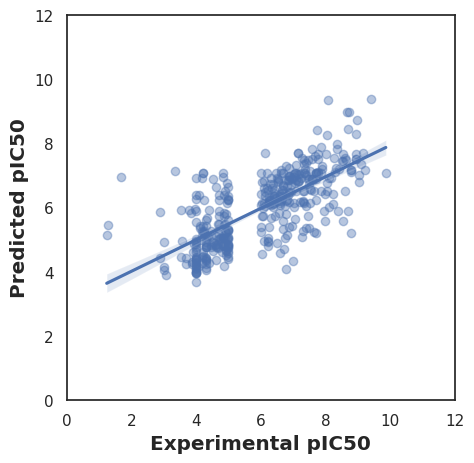

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = Y_test, y = Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## **8. Building a Regression Model using XGB**

In [ ]:
'''
Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [6,7,8],
           'learning_rate': [0.01,0.015,0.02],
           'n_estimators': [780,720,700],
           'colsample_bytree': [0.1,0.15,0.2]
           }
model = xgb.XGBRegressor()
model_random = RandomizedSearchCV(estimator = model, scoring="accuracy", param_distributions = params, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
model_grid = model_random.fit(X,Y)
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best accuracy: '+str(model_grid.best_score_))'''

In [ ]:
model = xgb.XGBRegressor(n_estimators=720, max_depth= 7, learning_rate=0.015, colsample_bytree=0.15)
model.fit(X_train, Y_train)
r2 = model.score(X_train, Y_train)
r2

0.7523093250195693

In [ ]:
Y_pred = model.predict(X_test)
print('Coefficient of determination (R^2): %.2f' 
      % r2_score(Y_test, Y_pred)) # A higher coefficient indicates a better fit for the model
print('Mean squared error (MSE): %.2f'  # Lower the MSE, the closer is forecast to actual
      % mean_squared_error(Y_test, Y_pred))

Coefficient of determination (R^2): 0.52
Mean squared error (MSE): 1.28


## **9. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

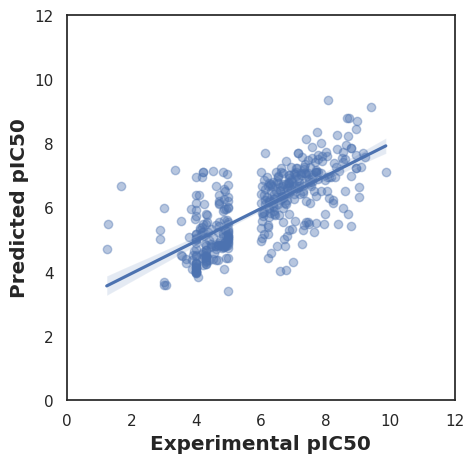

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = Y_test, y = Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## **10. Building a Regression Model using LGBM**

In [ ]:
'''
Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # 11 integers in range 10-110
max_depth.append(None)
num_leaves = [int(x) for x in np.linspace(31, 110, num = 11)] 
learning_rate =[0.1,0.2,0.3]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'num_leaves':num_leaves,
               'learning_rate':learning_rate
               }

# Use the random grid to search for best hyperparameters
# First create the base model to tune
model = ltb.LGBMRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_grid = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
model_grid.fit(X, Y)
print('Best hyperparameters are: '+str(model_grid.best_params_))'''

In [ ]:
model = ltb.LGBMRegressor(n_estimators=200,max_depth=40,num_leaves= 31,random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_train, Y_train)
r2

0.7480872121466611

In [ ]:
Y_pred = model.predict(X_test)
print('Coefficient of determination (R^2): %.2f' 
      % r2_score(Y_test, Y_pred)) # A higher coefficient indicates a better fit for the model
print('Mean squared error (MSE): %.2f'  # Lower the MSE, the closer is forecast to actual
      % mean_squared_error(Y_test, Y_pred))

Coefficient of determination (R^2): 0.51
Mean squared error (MSE): 1.29


## **11. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

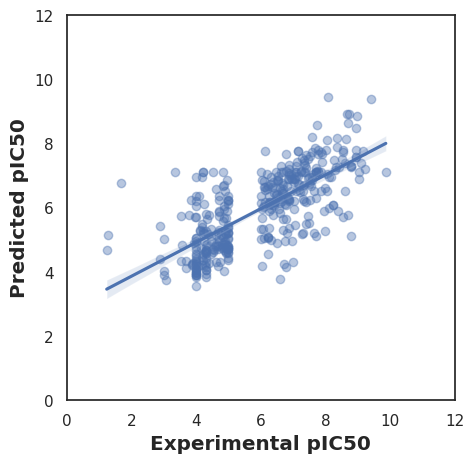

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = Y_test, y = Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## **12. Building a Regression Model using Random Forest**

In [ ]:
'''
Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # 11 integers in range 10-110
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, Y)
print('Best hyperparameters are: '+str(rf_random.best_params_))'''

In [ ]:
model = RandomForestRegressor(n_estimators=950, min_samples_split= 5, min_samples_leaf= 1, max_features='sqrt', max_depth=70, bootstrap=True, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_train, Y_train)
r2

0.7586282215748252

In [ ]:
Y_pred = model.predict(X_test)
print('Coefficient of determination (R^2): %.2f' 
      % r2_score(Y_test, Y_pred)) # A higher coefficient indicates a better fit for the model
print('Mean squared error (MSE): %.2f'  # Lower the MSE, the closer is forecast to actual
      % mean_squared_error(Y_test, Y_pred))

Coefficient of determination (R^2): 0.51
Mean squared error (MSE): 1.29


## **13. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

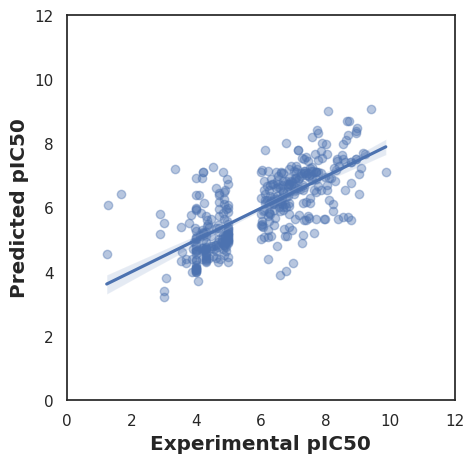

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = Y_test, y = Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show